In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



/kaggle/input/imdb-video-games/imdb-videogames.csv


In [2]:
imdb = pd.read_csv('/kaggle/input/imdb-video-games/imdb-videogames.csv')

In [3]:
imdb.describe()

,Unnamed: 0,year,rating
count,20803.000000,20536.000000,11600.000000
mean,10401.000000,2005.568611,7.047526
std,6005.453161,11.846028,1.235204
min,0.000000,1952.000000,1.000000
25%,5200.500000,1997.000000,6.400000
50%,10401.000000,2008.000000,7.200000
75%,15601.500000,2016.000000,7.900000
max,20802.000000,2027.000000,9.700000


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20803 non-null  int64  
 1   name         20803 non-null  object 
 2   url          20803 non-null  object 
 3   year         20536 non-null  float64
 4   certificate  7903 non-null   object 
 5   rating       11600 non-null  float64
 6   votes        11600 non-null  object 
 7   plot         20803 non-null  object 
 8   Action       20803 non-null  bool   
 9   Adventure    20803 non-null  bool   
 10  Comedy       20803 non-null  bool   
 11  Crime        20803 non-null  bool   
 12  Family       20803 non-null  bool   
 13  Fantasy      20803 non-null  bool   
 14  Mystery      20803 non-null  bool   
 15  Sci-Fi       20803 non-null  bool   
 16  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [5]:
imdb['votes'] = imdb['votes'].str.replace(',', '')
imdb['votes'] = imdb['votes'].astype('float')

In [6]:
imdb = imdb.drop_duplicates(subset='name', keep='first')   # some games were repeated

In [7]:
imdb.head(3)

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,20759.0,"When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False


In [8]:
imdb.drop(labels='url', axis=1, inplace=True)  # not helpful for analytics purposes

In [9]:
imdb.tail(3)

,Unnamed: 0,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
20800,20800,Shutter,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,20801,The Music Machine,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True
20802,20802,Cryptic,2020.0,NaN,NaN,NaN,Kidnapped by an insane man and dragged into a ...,False,False,False,False,False,False,False,False,True


In [10]:
imdb.describe()

,Unnamed: 0,year,rating,votes
count,19714.000000,19454.000000,10658.000000,10658.000000
mean,10195.677792,2005.627120,7.005817,431.040064
std,5955.683969,11.824822,1.228753,1935.936669
min,0.000000,1952.000000,1.000000,5.000000
25%,5040.250000,1997.000000,6.400000,16.000000
50%,10149.500000,2008.000000,7.200000,43.000000
75%,15199.750000,2016.000000,7.800000,160.000000
max,20802.000000,2027.000000,9.700000,60590.000000


## Looking at the Top 10 Games in Rating and Popularity

In [11]:
imdb.sort_values(by='rating', ascending=False).head(10)

,Unnamed: 0,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
80,80,Mass Effect: Legendary Edition,2021.0,M,9.7,1583.0,A compilation of the first three Mass Effect g...,True,True,False,False,False,False,False,True,False
295,295,The Witcher 3: Wild Hunt - Blood and Wine,2016.0,M,9.7,7555.0,Geralt is in the southern province of Toussain...,True,True,False,False,False,False,False,False,False
7,7,The Last of Us,2013.0,M,9.7,60590.0,"In a hostile, post-pandemic world, Joel and El...",True,True,False,False,False,False,False,False,False
1,1,Red Dead Redemption II,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
28,28,The Witcher 3: Wild Hunt,2015.0,M,9.7,26083.0,A monster hunter for hire embarks on an epic j...,True,True,False,False,False,False,False,False,False
251,251,The Legend of Zelda: Ocarina of Time,1998.0,E,9.6,9526.0,A young Kokiri boy discovers that his destiny ...,True,True,False,False,False,True,False,False,False
3,3,God of War,2018.0,M,9.6,26118.0,"After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
151,151,Metal Gear Solid,1998.0,M,9.6,11780.0,A crack government anti-terrorist squad takes ...,True,True,False,False,False,False,False,False,False
209,209,Persona 5 Royal,2019.0,M,9.6,1189.0,A group of high school students create a vigil...,True,True,False,False,False,True,False,False,False
222,222,Star Wars: Knights of the Old Republic,2003.0,T,9.5,8600.0,"A republic soldier, training to become a Jedi ...",True,True,False,False,False,True,False,False,False


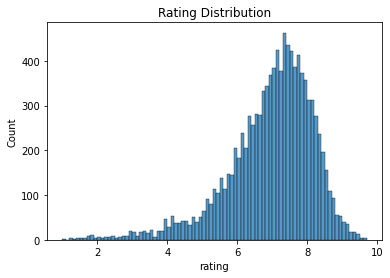

In [12]:
rating_hist = sns.histplot(data=imdb, x='rating', binwidth=0.1).set(title='Rating Distribution')

In [13]:
imdb.sort_values(by='votes', ascending=False).head(10)

,Unnamed: 0,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
7,7,The Last of Us,2013.0,M,9.7,60590.0,"In a hostile, post-pandemic world, Joel and El...",True,True,False,False,False,False,False,False,False
2,2,Grand Theft Auto V,2013.0,M,9.5,59986.0,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
17,17,Grand Theft Auto: San Andreas,2004.0,M,9.4,39629.0,"A family tragedy prompts gangster Carl ""CJ"" Jo...",True,False,False,True,False,False,False,False,False
1,1,Red Dead Redemption II,2018.0,M,9.7,35703.0,Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
41,41,Grand Theft Auto IV,2008.0,M,8.9,34553.0,"Niko Bellic comes to Liberty City, America to ...",True,False,False,True,False,False,False,False,False
42,42,Batman: Arkham City,2011.0,T,9.4,30763.0,When part of Gotham is turned into a private r...,True,True,False,True,False,False,False,False,False
5,5,The Last of Us: Part II,2020.0,M,8.5,30460.0,"Five years after the events of The Last of Us,...",True,True,False,False,False,False,False,False,False
36,36,The Elder Scrolls V: Skyrim,2011.0,M,9.4,29382.0,"After escaping execution, the last living Drag...",True,True,False,False,False,True,False,False,False
4,4,Uncharted 4: A Thief's End,2016.0,T,9.5,28722.0,Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
53,53,Batman: Arkham Asylum,2009.0,T,9.2,27584.0,You control Batman as he fights to subdue The ...,True,True,False,True,False,False,False,False,False


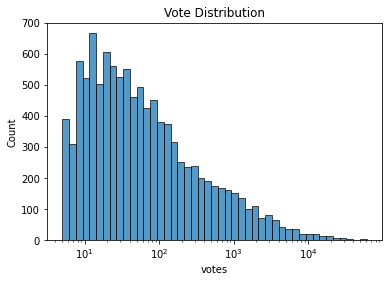

In [14]:
vote_hist = sns.histplot(data=imdb, x='votes', log_scale=True).set(title='Vote Distribution')

### **Insights:**

* **Action, Adventure, and Crime are popular genres among the top 10 most popular games**
    * Could be because these are popular genres among consumers? Or that just the top 10 games are of these genres? (look at genres outside of top 10)
* **Certain franchises seem to be popular**; only 6 of the 10 most popular games are unique series
    * Makes sense - if a game does well companies are more inclined to produce sequels
    * Most of the Top 10 popular games are sequels, possibly due to graphics improving? or a growing video game consumer market?
* **Typically, games tend to stick to ~2 genres.**
    * Is this true for all games? Or a product of successful ones?
    * Maybe just the method behind how the games were classified?

### Genre Analysis

In [15]:
print('Genre Breakdown of All Games')
percent_genre = imdb.loc[:, 'Action':'Thriller'].mean().mul(100).round(1).sort_values(ascending=False).astype(str) + ('%')  
count_genre = imdb.loc[:, 'Action':'Thriller'].apply(pd.value_counts).iloc[1].sort_values(ascending=False)  

genre_distr = pd.DataFrame({'Count': count_genre, 'Percent': percent_genre})
print(genre_distr)

Genre Breakdown of All Games
           Count Percent
Action     11047   56.0%
Adventure   9657   49.0%
Fantasy     4032   20.5%
Sci-Fi      3360   17.0%
Family      2719   13.8%
Comedy      1702    8.6%
Mystery     1124    5.7%
Crime        798    4.0%
Thriller     487    2.5%


In [16]:
pop100 = imdb.sort_values(by='votes', ascending=False).head(100)

print('Genre Breakdown of the Most Popular 100 Games')
pop100.loc[:, 'Action':'Thriller'].mean().mul(100).round(2).sort_values(ascending=False).astype(str) + ('%')

Genre Breakdown of the Most Popular 100 Games


Action       93.0%
Adventure    74.0%
Crime        19.0%
Fantasy      19.0%
Sci-Fi       16.0%
Thriller      9.0%
Mystery       6.0%
Comedy        2.0%
Family        1.0%
dtype: object

Action and Adventure genres are even more prevalent among the most popular 100 games, while Comedy and Family genres had a sharp decline. Crime went from making up only 7% of all games to 19% of the most popular 100 games. Thriller slightly increased while Sci-Fi and Mystery remained relatively unchanged.

Since these percentages are based on votes, we can only speak on the popularity of these genres, rather than their successes. But could popularity be an indicator of a highly-rated game?

### Relationship between # of votes and rating

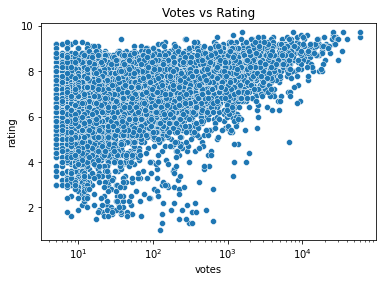

In [17]:
vote_plot = sns.scatterplot(data=imdb, x='votes', y='rating').set(title='Votes vs Rating', xscale='log')

We can see a large spread of ratings from games with 10-1000 votes. Only after we reach the 1000+ votes mark is there a positive trend between votes and rating. 

Could there be a significant difference between games in the 10-1000 vote range and games past the 1000 vote mark? If we had the data, something like budget or team size could be interesting to look at.

In [18]:
low_votes = imdb.loc[imdb.votes <= 1000]
high_votes = imdb.loc[imdb.votes > 1000]

print(f'Median Rating for Games < 1000 Votes: {low_votes.rating.median()}')
print(f'Median Rating for Games > 1000 Votes: {high_votes.rating.median()}')
print(f'Median Rating of All Games: {imdb.rating.median()}')

Median Rating for Games < 1000 Votes: 7.1
Median Rating for Games > 1000 Votes: 8.2
Median Rating of All Games: 7.2


This is an important result because we can use it to assume a relationship with how popular a game is and its rating. As popularity is a measure of success, we can compare statistics/trends to statistics/trends of the most popular games to determine what kind of factors are important in the success of a game.

### Importance of a Game's Audience

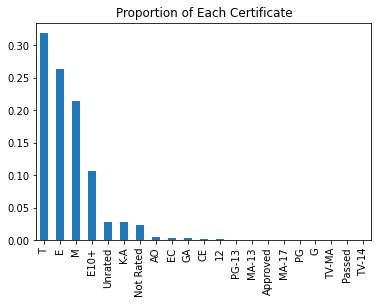

In [19]:
cert_plot = imdb.certificate.value_counts(normalize=True, ascending=False).plot(kind='bar', title='Proportion of Each Certificate')

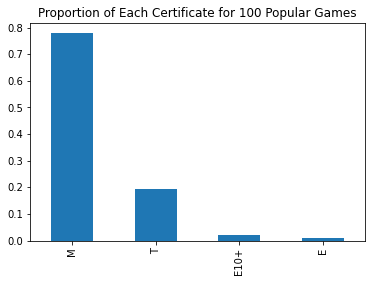

In [20]:
cert_plot100 = pop100.certificate.value_counts(normalize=True, ascending=False).plot(kind='bar', title='Proportion of Each Certificate for 100 Popular Games')

When considering all games, games catered towards children make up ~65% of the total (E, E10+, T); for the 100 most popular games, people tend to like games catered towards more mature audiences.

According to the Entertainment Rating Software Board (ESRB), E (Everyone) and E10+ (Everyone 10+) rated games contain content suitable for all ages and ages 10+, with content limited to minimal cartoon violence, mild language, and minimal use of suggestive themes. T (Teen) rated games contain content suitable for ages 13+ but now allow the use of minimal blood and infrequent use of strong language.

M (Mature) rated games contain content suitable for ages 17+ and allow the use of intense violence, blood and gore, sexual content, and strong language.

To give an idea of what kind of games fall under these ratings, here are a few of the most popular under each rating.

In [21]:
top3_E = imdb.loc[imdb.certificate == 'E'].sort_values(by='votes', ascending=False).head(3)
top3_E10 = imdb.loc[imdb.certificate == 'E10+'].sort_values(by='votes', ascending=False).head(3)
top3_T = imdb.loc[imdb.certificate == 'T'].sort_values(by='votes', ascending=False).head(3)
top3_M = imdb.loc[imdb.certificate == 'M'].sort_values(by='votes', ascending=False).head(3)

top3_certs = [top3_E, top3_E10, top3_T, top3_M]
certs_df = pd.concat(top3_certs)
certs_df.loc[:, ['name', 'certificate', 'votes', 'rating']]

,name,certificate,votes,rating
251,The Legend of Zelda: Ocarina of Time,E,9526.0,9.6
171,Kingdom Hearts,E,7349.0,9.2
567,Super Mario Galaxy,E,5314.0,9.0
10023,Portal 2,E10+,15609.0,9.4
85,Minecraft,E10+,10880.0,8.5
180,Kingdom Hearts II,E10+,7168.0,9.3
42,Batman: Arkham City,T,30763.0,9.4
4,Uncharted 4: A Thief's End,T,28722.0,9.5
53,Batman: Arkham Asylum,T,27584.0,9.2
7,The Last of Us,M,60590.0,9.7


It's interesting to see that as the games get progressively more explicit, popularity increases too. This could be in part due to how survey data was collected; rating a game on IMDB requires the user to have an IMDB account. Games catered towards children are probably not going to have a large portion of their audience rating their game on IMDB. What kind of 10-year old even knows what IMDB is, let alone has an IMDB account?

Taken from IMDB:
As of 10/10/22, Minecraft has 11,110 votes, and 3,969 votes are from users that have chosen to provide their age. Of those 3,969 votes:

**< 18:** 84

**18-29:** 2,136

**30-44:** 1,416

**45+:** 333

**From this, we can infer that conclusions taken from this dataset speak mainly on the opinons of more mature audiences.**

<AxesSubplot:title={'center':'Proportion of Each Certificate for Action Games'}>

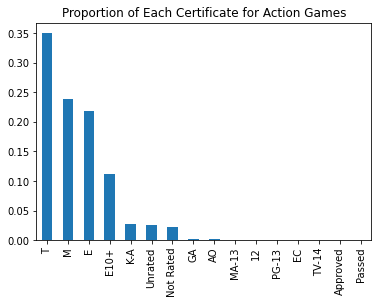

In [22]:
imdb_action = imdb.loc[imdb.Action == True]
imdb_action100 = imdb.loc[imdb.Action == True].sort_values(by = 'votes', ascending=False).head(100)

imdb_action.certificate.value_counts(normalize=True, ascending=False).plot(kind='bar', title='Proportion of Each Certificate for Action Games')

<AxesSubplot:title={'center':'Proportion of Each Certificate for Top 100 Popular Action Games'}>

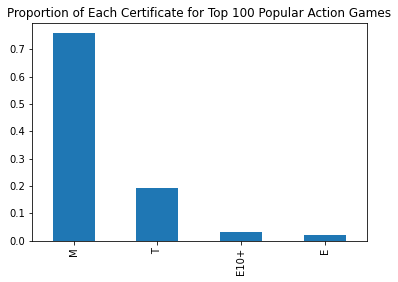

In [23]:
imdb_action100.certificate.value_counts(normalize=True, ascending=False).plot(kind='bar', title='Proportion of Each Certificate for Top 100 Popular Action Games')

### **Insights**

* **When looking at the distribution of genres across all games vs the 100 most popular games, we found that action and adventure games were dominant in both categories. However, the distribution of certificates is vastly different.**
    * This indicates that it's not only important to consider genre, but also who you cater your game to. In other words, action games are popular, but an older audience prefers action games catered towards mature audiences with mature themes and gameplay.
